In [157]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [158]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_data.shape

(569, 30)

In [159]:
cancer_input = pd.DataFrame(cancer_data)
ci=cancer_input.head()
cancer_lbls = cancer.target
cl=cancer_lbls

In [160]:
display(ci)
display(cl)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [161]:
ci

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [162]:
display(cl)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [163]:
labels = np.reshape(cancer_labels,(569,1))
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)
final_cancer_data.shape

(569, 31)

In [164]:
cancer_dataset = pd.DataFrame(final_cancer_data)
features = cancer.feature_names
features
features_labels = np.append(features,'label') 
cancer_dataset.columns = features_labels 
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [165]:
cancer_dataset['label'].replace(0, 'Benign',inplace=True) 
cancer_dataset['label'].replace(1, 'Malignant',inplace=True) 
cancer_dataset.head()
cancer_dataset.tail()
cancer_dataset.lookup

<bound method DataFrame.lookup of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [166]:
X = cancer_dataset.iloc[:,0:30].values
Y = cancer_dataset.iloc[:,30].values
X[0:2]
Y[0:30]

array(['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign'], dtype=object)

In [167]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size =0.8, test_size = 0.2, random_state = 1)
X_train.shape
scalar_X = StandardScaler()
X_train = scalar_X.fit_transform(X_train)
X_test = scalar_X.transform(X_test)
X_train[0:2]
X_test[0:2]

array([[ 0.1318529 , -1.22289689,  0.22619275, -0.02342069,  0.49000614,
         1.51274076,  0.69035091,  0.34062714,  1.00887608,  1.68985368,
         0.46502905,  0.4984039 ,  0.89667244,  0.15891919,  0.96784528,
         1.47162979,  0.71801321,  0.62374042,  0.72742307,  0.58673486,
         0.0096267 , -1.17235657,  0.16795261, -0.15304782, -0.04232703,
         0.69426554,  0.24403833, -0.07497962, -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, -0.35886667,  1.41492503,
         0.34748089,  0.41096309,  0.6047969 ,  1.16313403,  0.75249628,
        -0.43754168, -0.57647299, -0.48507353, -0.36066018, -0.15852592,
        -0.13506781, -0.09651403,  0.04271576, -0.37313667, -0.06434509,
        -0.14811217,  0.3573236 , -0.15665281, -0.23681236,  2.09613603,
         1.03762014,  1.11980787,  1.38865765,  1.72716717,  2.06060854]])

In [168]:
classifier_L = LogisticRegression(random_state=0)
classifier_L.fit(X_train,Y_train)
Y_pred = classifier_L.predict(X_test)
Y_pred[0:29]

array(['Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign'], dtype=object)

In [169]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[40,  2],
       [ 1, 71]])

In [170]:
Acc_score = metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy:", Acc_score)

Accuracy: 0.9736842105263158


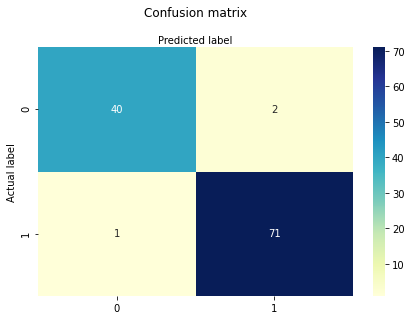

In [171]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cancer_dataset['label'].replace('Benign', 0, inplace=True)
cancer_dataset['label'].replace('Malignant', 1, inplace=True)

In [172]:
cancer_dataset['label'].replace('Benign', 0, inplace=True) 
cancer_dataset['label'].replace('Malignant', 1, inplace=True)
X = cancer_dataset.iloc[:,0:30].values
Y = cancer_dataset.iloc[:,30].values
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [173]:
scalar_X = StandardScaler()
X = scalar_X.fit_transform(X)
X[0:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [174]:
from sklearn.preprocessing import StandardScaler
for i in range(29):
    n_components = i + 2
    pca = PCA(n_components) 
    principalComponents_train = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents_train, columns = range(n_components))
    finalDf = pd.concat([principalDf, cancer_dataset[['label']]], axis = 1)
    Y_principal = finalDf.iloc[:,[n_components]].values
    X_principal = finalDf.iloc[:,0:(n_components - 1)] 
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(X_principal,Y_principal,train_size =0.8,test_size = 0.2,random_state = 1)
    classifier_L = LogisticRegression(random_state = 0)
    classifier_L.fit(X_train, np.ravel(Y_train))
    Y_pred1 = classifier_L.predict(X_test)
    Y_pred1[0:9]
    cnf_matrix = confusion_matrix(Y_test,Y_pred1)
    cnf_matrix
    from sklearn import metrics
    Acc_score1 = metrics.accuracy_score(Y_test,Y_pred1)
    print("Accuracy:", Acc_score1)
    Prec_score1 = metrics.precision_score(Y_test,Y_pred1)
    print("Precision:", Prec_score1)
    Rec_score1 = metrics.recall_score(Y_test,Y_pred1)
    print("Recall:", Rec_score1)
    pcaDF.append([n_components,Acc_score1,Prec_score1,Rec_score1])
print(pcaDF)

Accuracy: 0.8771929824561403
Precision: 0.8717948717948718
Recall: 0.9444444444444444
Accuracy: 0.9473684210526315
Precision: 0.9342105263157895
Recall: 0.9861111111111112
Accuracy: 0.9473684210526315
Precision: 0.9342105263157895
Recall: 0.9861111111111112
Accuracy: 0.9649122807017544
Precision: 0.9473684210526315
Recall: 1.0
Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0
Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0
Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0
Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
Accuracy: 0.9736842105263158
Precision: 0.9726027397260274
Recall: 0.9861111111111112
Accuracy: 0.9736842105263158
Precision: 0.9726027397260274
Recall: 0.9861111111111112
Accuracy: 0.9824561403508771
Precision: 0.972972

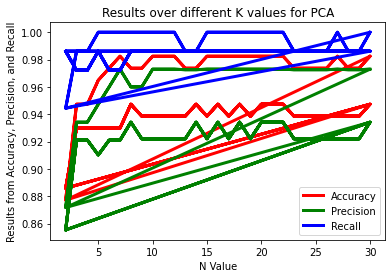

In [175]:
N_to_K = Parse(pcaDF,0)
Acc_Vals = Parse(pcaDF,1)
Prec_Vals = Parse(pcaDF,2)
Recall_Vals = Parse(pcaDF,3)

plt.plot(N_to_K, Acc_Vals, 'r', label = 'Accuracy',linewidth=3)
plt.plot(N_to_K, Prec_Vals, 'g', label = 'Precision', linewidth=3)
plt.plot(N_to_K, Recall_Vals,  'b', label = 'Recall', linewidth=3)

plt.title("Results over different K values for PCA")
plt.xlabel("N Value")
plt.ylabel("Results from Accuracy, Precision, and Recall")
plt.legend(loc = 'lower right')
plt.show()

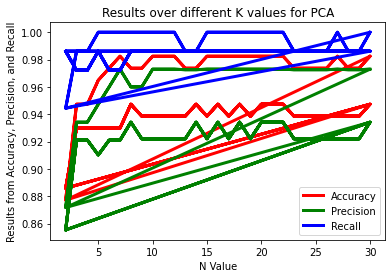

In [176]:
def Parse(Value, i):
    return [item[i] for item in Value]
N_to_K = Parse(pcaDF,0)
Acc_Vals = Parse(pcaDF,1)
Prec_Vals = Parse(pcaDF,2)
Recall_Vals = Parse(pcaDF,3)
plt.plot(N_to_K, Acc_Vals, 'r', label = 'Accuracy',linewidth=3)
plt.plot(N_to_K, Prec_Vals, 'g', label = 'Precision', linewidth=3)
plt.plot(N_to_K, Recall_Vals,  'b', label = 'Recall', linewidth=3)

plt.title("Results over different K values for PCA")
plt.xlabel("N Value")
plt.ylabel("Results from Accuracy, Precision, and Recall")
plt.legend(loc = 'lower right')
plt.show()

In [177]:
cancer_dataset['label'].replace('Benign', 0, inplace=True) 
cancer_dataset['label'].replace('Malignant', 1, inplace=True)

In [178]:
X = cancer_dataset.iloc[:,0:30].values
Y = cancer_dataset.iloc[:,30].values
Y[0:10]
scalar_X = StandardScaler()
X = scalar_X.fit_transform(X)
X[0:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [179]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_train = lda.fit_transform(X,Y)

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(lda_train,Y,train_size =0.8, test_size = 0.2, random_state = 1)
classifier_G = GaussianNB()
classifier_G.fit(X_train,Y_train)
Y_pred = classifier_G.predict(X_test)
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

Text(0.5, 257.44, 'Predicted label')

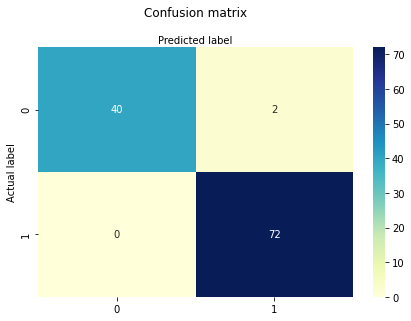

In [181]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [182]:
X = cancer_dataset.iloc[:,0:30].values
Y = cancer_dataset.iloc[:,30].values
scalar_X = StandardScaler()
X = scalar_X.fit_transform(X)
X[0:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [183]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_train = lda.fit_transform(X,Y)

In [184]:
classifier_L = LogisticRegression(random_state=0)
classifier_L.fit(X_train,Y_train)
Y2_pred = classifier_L.predict(X_test)
Y2_pred[0:9]

array([1, 0, 1, 0, 0, 0, 0, 1, 1])

In [185]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test,Y2_pred)
cnf_matrix

array([[37,  5],
       [ 0, 72]])

In [186]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y2_pred))
print("Precision:",metrics.precision_score(Y_test,Y2_pred))
print("Recall:",metrics.recall_score(Y_test,Y2_pred))

Accuracy: 0.956140350877193
Precision: 0.935064935064935
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

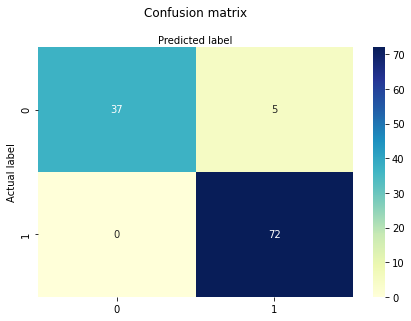

In [187]:
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')